In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
data=pd.read_csv("dataset.csv")

In [67]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [68]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,337.000000,342.000000,342.000000,342.000000
mean,43.876855,17.151170,200.915205,4273.976608
std,5.478600,1.974793,14.061714,1119.229602
min,32.100000,13.100000,172.000000,2700.000000
25%,39.200000,15.600000,190.000000,3550.000000
50%,44.100000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,15000.000000


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [70]:
data.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [71]:
numerical_cols=[i for i in data.columns if data.dtypes[i]=="float64"]
categorical_cols=[i for i in data.columns if data.dtypes[i]=="O"]

print(f"Numerical Columns are:{numerical_cols}")
print("")
print(f"Categorical Columns are:{categorical_cols}")


Numerical Columns are:['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

Categorical Columns are:['species', 'island', 'sex']


In [72]:
#Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it 

#Identify missing data
print("Missing data summary (before cleaning):")
print(data.isnull().sum())

# Handle missing values
# For Numerical columns Replacing missing values with the column mean
data[numerical_cols] = data[numerical_cols].apply(lambda col: col.fillna(col.mean()))

#For Categorical columns: Replacing missing values with the column mode
data[categorical_cols] = data[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

print("\nMissing data summary (after cleaning):")
print(data.isnull().sum())



Missing data summary (before cleaning):
species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

Missing data summary (after cleaning):
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [5]:
#Q2: What is the average body_mass_g for Gentoo penguins? 
gentoo_avg_body_mass = data[data['species'] == 'Gentoo']['body_mass_g'].mean()

print(f"Average body mass for Gentoo penguins: {gentoo_avg_body_mass:.2f} grams")


Average body mass for Gentoo penguins: 5126.81 grams


Skewness and Kurtosis for each species:

Species: Adelie
  Feature: bill_length_mm
    Skewness: 0.16
    Kurtosis: -0.23
  Feature: bill_depth_mm
    Skewness: 0.33
    Kurtosis: -0.10

Species: Gentoo
  Feature: bill_length_mm
    Skewness: 0.71
    Kurtosis: 1.15
  Feature: bill_depth_mm
    Skewness: 0.33
    Kurtosis: -0.61

Species: Chinstrap
  Feature: bill_length_mm
    Skewness: -0.10
    Kurtosis: -0.12
  Feature: bill_depth_mm
    Skewness: 0.01
    Kurtosis: -0.90


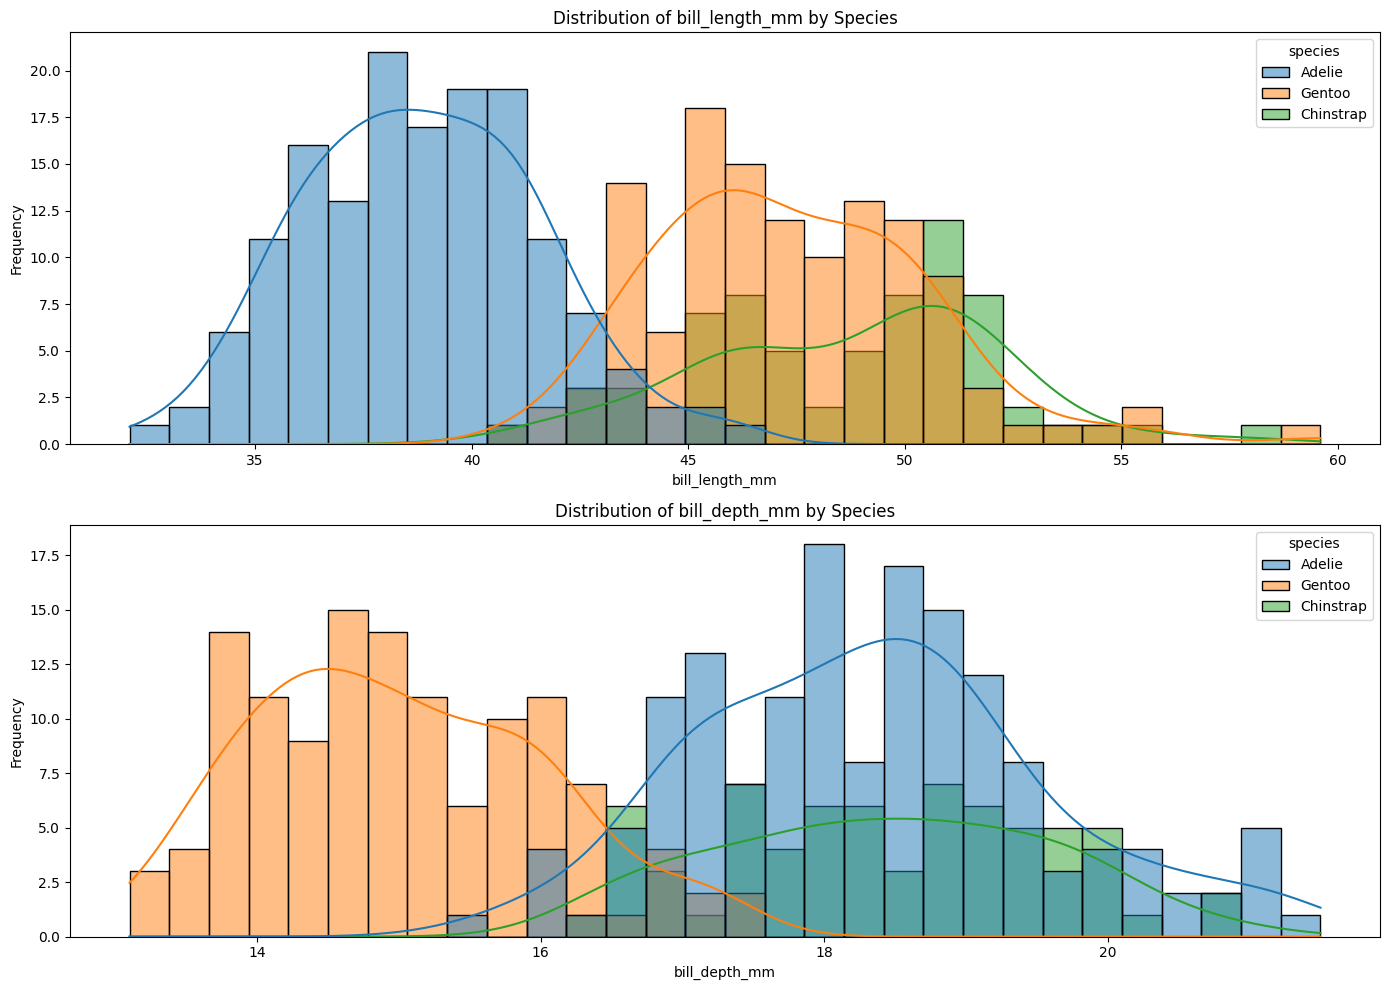

In [79]:
#Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species.


from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Analyze skewness and kurtosis for each species
features = ['bill_length_mm', 'bill_depth_mm']
distribution_metrics = {}

for species in data['species'].unique():
    species_data = data[data['species'] == species]
    distribution_metrics[species] = {
        feature: {
            "skewness": skew(species_data[feature]),
            "kurtosis": kurtosis(species_data[feature])
        }
        for feature in features
    }

# Print results
print("Skewness and Kurtosis for each species:")
for species, metrics in distribution_metrics.items():
    print(f"\nSpecies: {species}")
    for feature, stats in metrics.items():
        print(f"  Feature: {feature}")
        print(f"    Skewness: {stats['skewness']:.2f}")
        print(f"    Kurtosis: {stats['kurtosis']:.2f}")

# Visualizing the distributions for each feature by species
plt.figure(figsize=(14, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 1, i)
    sns.histplot(data, x=feature, hue='species', kde=True, bins=30)
    plt.title(f"Distribution of {feature} by Species")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# For Bill Length (bill_length_mm):

# Gentoo: Longest bills, right-skewed distribution.
# Adelie: Shorter bills, symmetric distribution.
# Chinstrap: Similar to Adelie but slightly longer, right-skewed.

# For Bill Depth (bill_depth_mm):

# Gentoo: Shallowest bills, consistent with less variation.
# Adelie: Moderate depth, symmetric.
# Chinstrap: Deepest bills, right-skewed.


bill_length_mm: 0 
bill_depth_mm: 0 
flipper_length_mm: 0 
body_mass_g: 3 


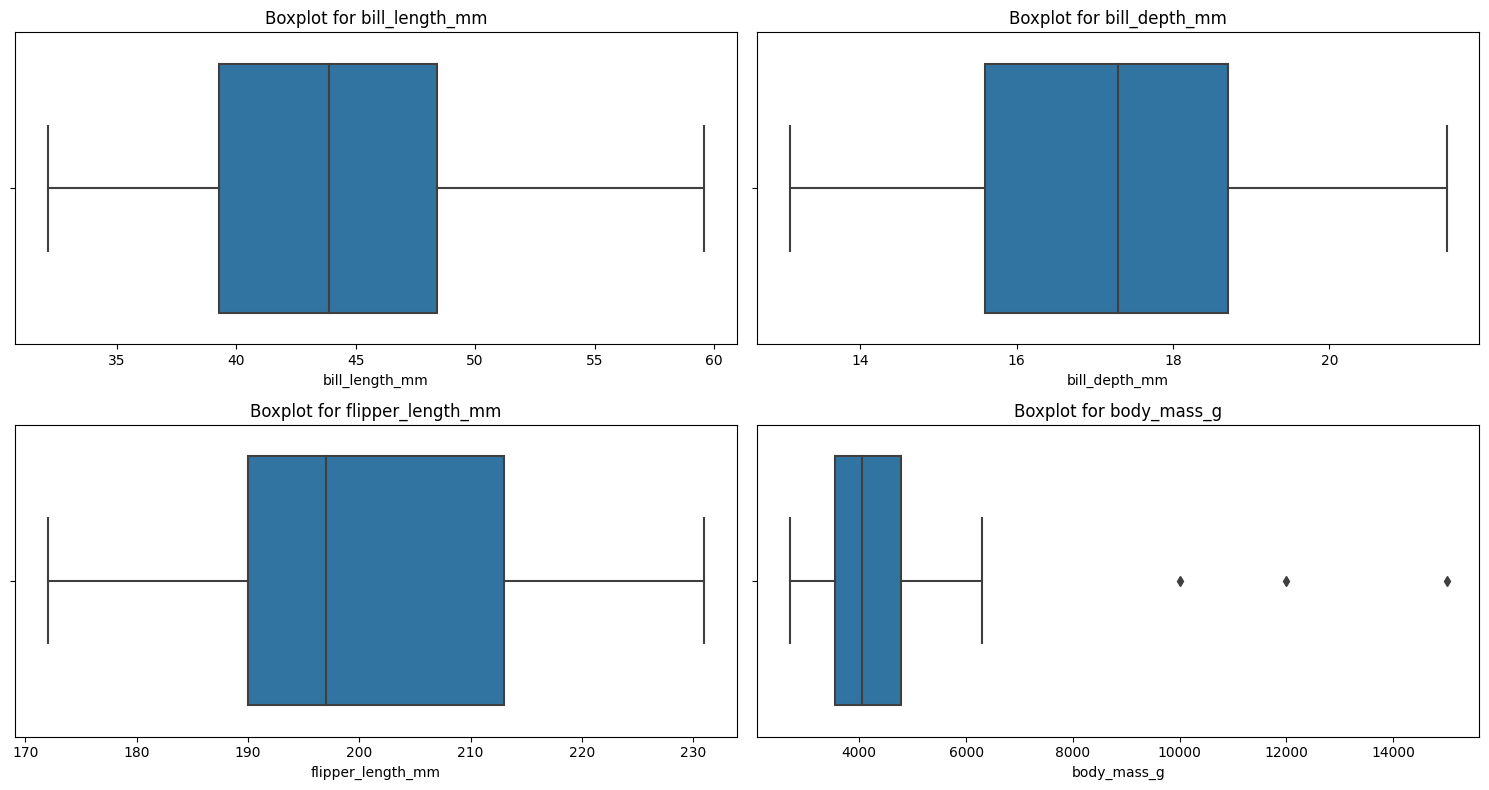

In [76]:
#Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers.

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_summary = {}
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(data, col)
    outlier_summary[col] = {
        "num_outliers": len(outliers),
        "lower_bound": lower,
        "upper_bound": upper
    }
    print(f"{col}: {len(outliers)} ")

# Step 3: Visualize outliers using boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()
#From the below diagrams we can see that the body_mass_g attribute has 3 outliers 

#Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA.

The curse of dimensionality t arise when a dataset has too many features (dimensions).
This dataset is not highly dimensional,it has only a few numerical features (bill_length_mm, bill_depth_mm, flipper_length_mm, and body_mass_g), so dimensionality is not an issue.So it does not contribute to the curse of dimensionality


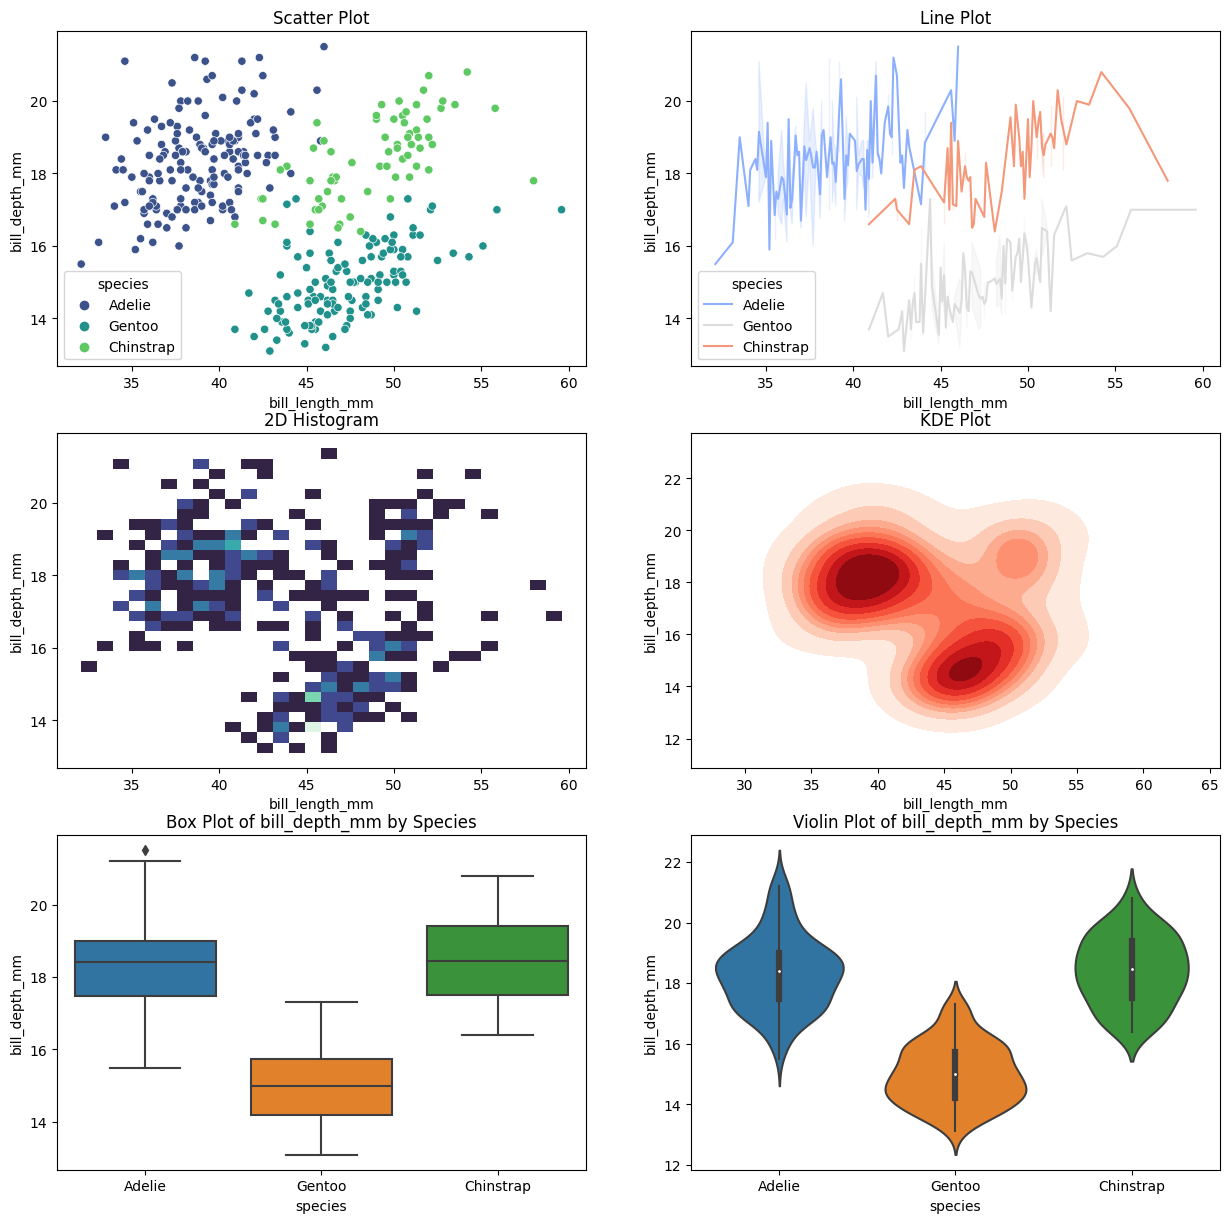

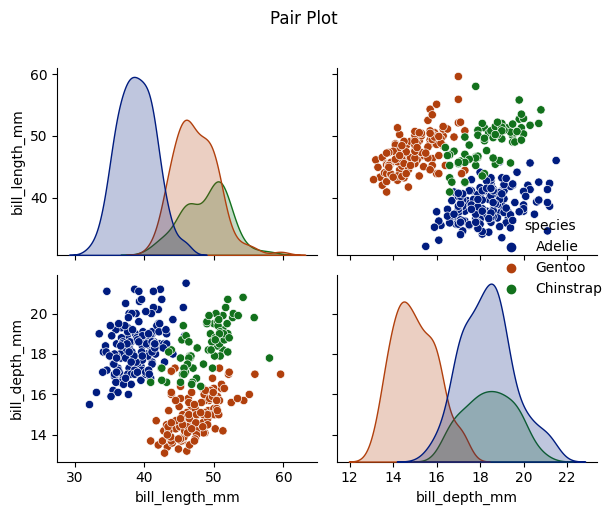

In [82]:
#Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them

import matplotlib.pyplot as plt
import seaborn as sns

x_col = 'bill_length_mm'
y_col = 'bill_depth_mm'

plt.figure(figsize=(15, 20))

# Scatter plot
plt.subplot(4, 2, 1)
sns.scatterplot(x=data[x_col], y=data[y_col], hue=data['species'], palette='viridis')
plt.title("Scatter Plot")

# Line plot
plt.subplot(4, 2, 2)
sns.lineplot(x=data[x_col], y=data[y_col], hue=data['species'], palette='coolwarm')
plt.title("Line Plot")

# Histogram (2D)
plt.subplot(4, 2, 3)
sns.histplot(data, x=x_col, y=y_col, bins=30, cmap='mako')
plt.title("2D Histogram")

# KDE (Kernel Density Estimate) plot
plt.subplot(4, 2, 4)
sns.kdeplot(x=data[x_col], y=data[y_col], cmap='Reds', fill=True)
plt.title("KDE Plot")

# Box plot
plt.subplot(4, 2, 5)
sns.boxplot(x=data['species'], y=data[y_col])
plt.title("Box Plot of bill_depth_mm by Species")

# Violin plot
plt.subplot(4, 2, 6)
sns.violinplot(x=data['species'], y=data[y_col])
plt.title("Violin Plot of bill_depth_mm by Species")

# Pair plot (focusing on the two features)
sns.pairplot(data, vars=[x_col, y_col], hue='species', palette='dark')
plt.suptitle("Pair Plot", y=1.02)

plt.tight_layout()
plt.show()


In [10]:
#Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island?

max_flipper_by_species_island = data.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()

# Step 2: Identify the species with the longest flippers on each island
max_flipper_by_island = max_flipper_by_species_island.loc[
    max_flipper_by_species_island.groupby('island')['flipper_length_mm'].idxmax()
]

# Print the results
print("Maximum flipper length by species and island:")
print(max_flipper_by_species_island)

print("\nSpecies with the longest flippers on each island:")
print(max_flipper_by_island)


Maximum flipper length by species and island:
     species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0

Species with the longest flippers on each island:
     species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0


In [85]:
#Q8: Perform z-score normalization on this dataset

from scipy.stats import zscore

data_normalized = data.copy() 
data_normalized[numerical_cols] = data[numerical_cols].apply(zscore)

print("Normalized dataset")
print(data_normalized[numerical_cols].head())


Normalized dataset
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.882230       0.787743          -1.422488    -0.470213
1       -0.808355       0.126556          -1.065352    -0.425343
2       -0.660604       0.431719          -0.422507    -0.918910
3        0.000000       0.000000           0.000000     0.000000
4       -1.325483       1.092905          -0.565361    -0.739431
